In [1]:
!pip install sqlalchemy
!pip install pyodbc

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pandas numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd

In [4]:
# Function to connect to AdventureWorks2022 database
def connect_to_adventureworks():
    dialect = 'mssql'
    server = 'localhost'
    database = 'AdventureWorks2022'
    eng = f'{dialect}+pyodbc://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'
    return create_engine(eng)

# Create an engine instance
engine = connect_to_adventureworks()

# Establish a connection
connection = engine.connect()

# Create an inspector
inspector = inspect(engine)

# Retrieve table information
schemas = inspector.get_schema_names()

# Initialize a dictionary to hold table names for each schema
schema_tables = {}

# Loop through schemas and list tables
for schema in schemas:
    schema_tables[schema] = inspector.get_table_names(schema=schema)

# Display the schema and table names
for schema, tables in schema_tables.items():
    print(f'Schema: {schema}')
    for table in tables:
        print(f' - {table}')

# Optionally, we can close the connection when done
connection.close()


Schema: db_accessadmin
Schema: db_backupoperator
Schema: db_datareader
Schema: db_datawriter
Schema: db_ddladmin
Schema: db_denydatareader
Schema: db_denydatawriter
Schema: db_owner
Schema: db_securityadmin
Schema: dbo
 - AWBuildVersion
 - DatabaseLog
 - ErrorLog
 - NewTable
Schema: guest
Schema: HumanResources
 - Department
 - Employee
 - EmployeeDepartmentHistory
 - EmployeePayHistory
 - JobCandidate
 - Shift
Schema: INFORMATION_SCHEMA
Schema: Person
 - Address
 - AddressType
 - BusinessEntity
 - BusinessEntityAddress
 - BusinessEntityContact
 - ContactType
 - CountryRegion
 - EmailAddress
 - Password
 - Person
 - PersonPhone
 - PhoneNumberType
 - StateProvince
Schema: Production
 - BillOfMaterials
 - Culture
 - Document
 - Illustration
 - Location
 - Product
 - ProductCategory
 - ProductCostHistory
 - ProductDescription
 - ProductDocument
 - ProductInventory
 - ProductListPriceHistory
 - ProductModel
 - ProductModelIllustration
 - ProductModelProductDescriptionCulture
 - ProductPhot

## 1. Top 10 Products by Total sales

In [5]:

Top_10_products = """
SELECT TOP 10
    p.Name AS ProductName,
    SUM(sod.LineTotal) AS TotalSales
FROM
    Sales.SalesOrderDetail sod
JOIN
    Production.Product p ON sod.ProductID = p.ProductID
GROUP BY
    p.Name
ORDER BY
    TotalSales DESC;
"""


Top_10_products_df = pd.read_sql_query(sql=Top_10_products, con = engine)

In [6]:
# Display the first few rows of the DataFrame
Top_10_products_df

,ProductName,TotalSales
0,"Mountain-200 Black, 38",4.400593e+06
1,"Mountain-200 Black, 42",4.009495e+06
2,"Mountain-200 Silver, 38",3.693678e+06
3,"Mountain-200 Silver, 42",3.438479e+06
4,"Mountain-200 Silver, 46",3.434257e+06
5,"Mountain-200 Black, 46",3.309673e+06
6,"Road-250 Black, 44",2.516857e+06
7,"Road-250 Black, 48",2.347656e+06
8,"Road-250 Black, 52",2.012448e+06
9,"Road-150 Red, 56",1.847819e+06


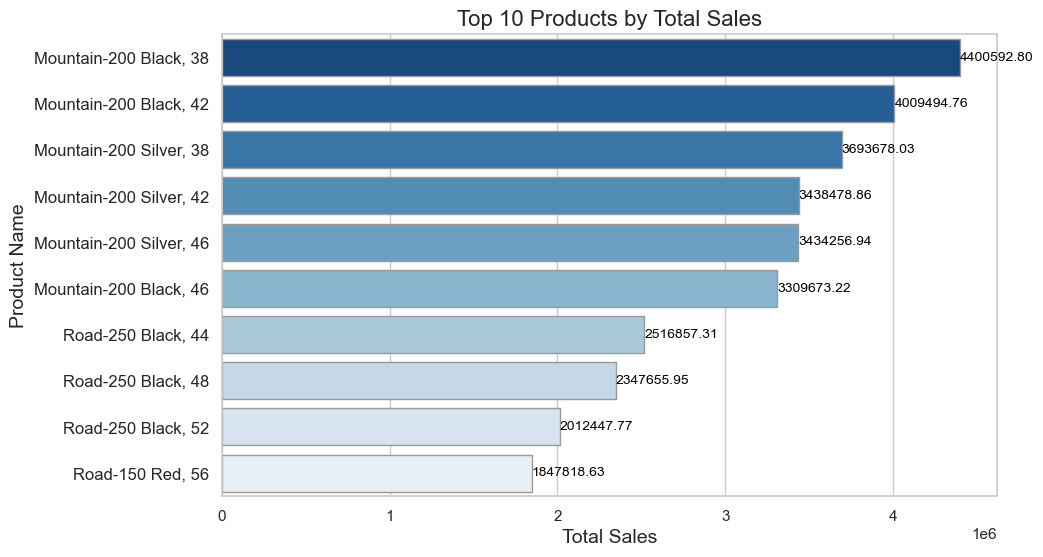

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

Top_10_products_df = Top_10_products_df.sort_values(by='TotalSales', ascending=False).head(10)

# Plotting the results with a horizontal bar plot using the custom color palette
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='TotalSales', y='ProductName', data=Top_10_products_df, palette='Blues_r', edgecolor=".6")

# Adding labels and title
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.title('Top 10 Products by Total Sales', fontsize=16)

# Adding values on bars with adjusted position
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=10, color='white')

# Add total sales value next to each bar 
for index, value in enumerate(Top_10_products_df['TotalSales']):
    plt.text(value + 50, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Customize y-axis labels for better readability
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=12)

plt.show()


## 2. Revenue Trend Over Time:

In [8]:
Revenue_OT = """
SELECT
    YEAR(OrderDate) AS Year,
    MONTH(OrderDate) AS Month,
    SUM(TotalDue) AS MonthlyRevenue
FROM
    Sales.SalesOrderHeader
GROUP BY
    YEAR(OrderDate), MONTH(OrderDate)
ORDER BY
    Year, Month;

"""

Revenue_OT_df = pd.read_sql_query(Revenue_OT, con = engine)

In [9]:
Revenue_OT_df

,Year,Month,MonthlyRevenue
0,2011,5,5.670209e+05
1,2011,6,5.070965e+05
2,2011,7,2.292183e+06
3,2011,8,2.800576e+06
4,2011,9,5.547916e+05
5,2011,10,5.156270e+06
6,2011,11,8.153130e+05
7,2011,12,1.462449e+06
8,2012,1,4.458337e+06
9,2012,2,1.649052e+06


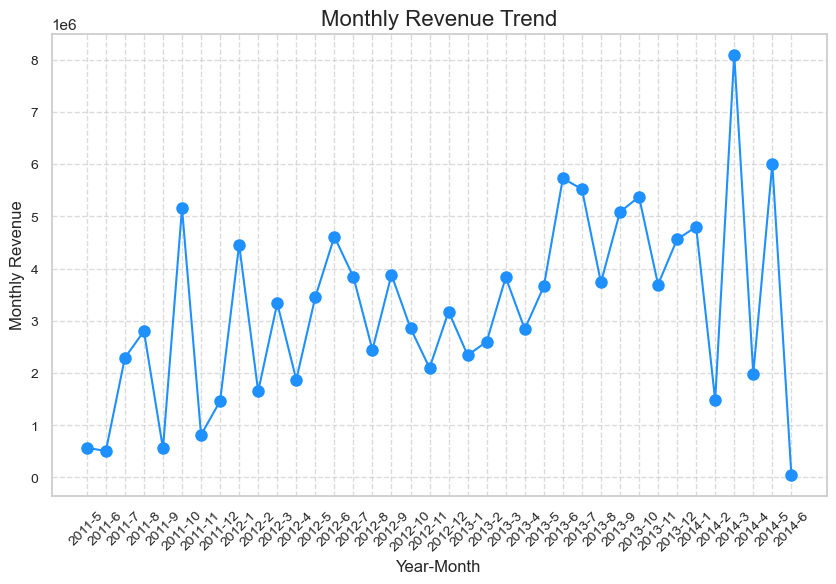

In [10]:
import matplotlib.pyplot as plt

# Create YearMonth column
Revenue_OT_df['YearMonth'] = Revenue_OT_df['Year'].astype(str) + '-' + Revenue_OT_df['Month'].astype(str)

# Plot Monthly Revenue Over Time
plt.figure(figsize=(10, 6))
plt.plot(Revenue_OT_df['YearMonth'], Revenue_OT_df['MonthlyRevenue'], 'o-', color='dodgerblue', markersize=8)

# Customize plot elements
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Monthly Revenue', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)



plt.show()


## 3. Customer Insights: 

In [12]:
customer_demographics = """
SELECT
    st.CountryRegionCode,
    COUNT(DISTINCT c.CustomerID) AS NumberOfCustomers,
    SUM(soh.TotalDue) AS TotalSalesAmount,
    (SUM(soh.TotalDue) / SUM(SUM(soh.TotalDue)) OVER ()) * 100 AS PercentageOfTotalSales
FROM 
    Sales.Customer c
JOIN 
    Sales.SalesOrderHeader soh ON c.CustomerID = soh.CustomerID
JOIN
    Sales.SalesTerritory st ON c.TerritoryID = st.TerritoryID
GROUP BY 
    st.CountryRegionCode
ORDER BY 
    TotalSalesAmount DESC;

"""

customer_demographics_df = pd.read_sql_query(customer_demographics, con = engine)

In [13]:
customer_demographics_df

,CountryRegionCode,NumberOfCustomers,TotalSalesAmount,PercentageOfTotalSales
0,US,8210,7.082986e+07,57.48
1,CA,1677,1.839893e+07,14.93
2,AU,3625,1.181438e+07,9.58
3,GB,1951,8.574049e+06,6.95
4,FR,1844,8.119749e+06,6.58
5,DE,1812,5.479820e+06,4.44


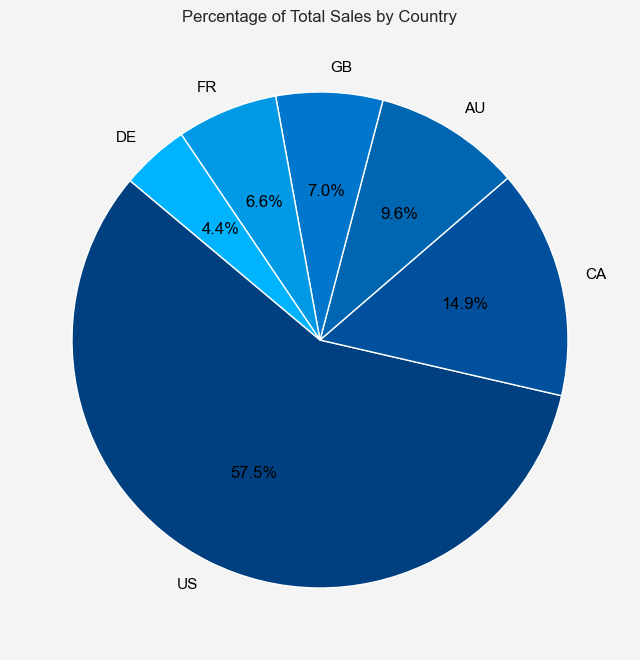

In [14]:
import matplotlib.pyplot as plt

# Custom color map for countries 
light_blue_country_color_map = {'US': '#004080', 'CA': '#00509e', 'AU': '#0066b2', 'GB': '#0077cc', 'FR': '#0099e6', 'DE': '#00b3ff'}

# Extract data from the DataFrame
country_codes, percentages = customer_demographics_df['CountryRegionCode'], customer_demographics_df['PercentageOfTotalSales']

# Set the figure size and background color
plt.figure(figsize=(8, 10), facecolor='#f4f4f4')  

# Create a pie chart
plt.pie(percentages, labels=country_codes, autopct='%1.1f%%', startangle=140, colors=(light_blue_country_color_map.get(code, 'lightgrey') for code in country_codes), textprops={'color': 'black'})
plt.title('Percentage of Total Sales by Country')


plt.show()


## 4. Employee Performance 

In [15]:
Employee_Performance = """
SELECT
    e.BusinessEntityID AS EmployeeID,
    p.FirstName,
    p.LastName,
    sp.SalesQuota,
    SUM(soh.TotalDue) AS TotalSalesAmount,
    (SUM(soh.TotalDue) / sp.SalesQuota) * 100 AS QuotaAchievementPercentage
FROM
    HumanResources.Employee e
JOIN
    Person.Person p ON e.BusinessEntityID = p.BusinessEntityID
JOIN
    Sales.SalesPerson sp ON e.BusinessEntityID = sp.BusinessEntityID
JOIN
    Sales.SalesOrderHeader soh ON sp.BusinessEntityID = soh.SalesPersonID
WHERE
    e.BusinessEntityID IS NOT NULL
    AND p.FirstName IS NOT NULL
    AND p.LastName IS NOT NULL
    AND sp.SalesQuota IS NOT NULL
    AND soh.TotalDue IS NOT NULL
GROUP BY
    e.BusinessEntityID,
    p.FirstName,
    p.LastName,
    sp.SalesQuota
ORDER BY
    TotalSalesAmount DESC;
"""
Employee_Performance_df = pd.read_sql_query(Employee_Performance, con = engine)

In [16]:
Employee_Performance_df

,EmployeeID,FirstName,LastName,SalesQuota,TotalSalesAmount,QuotaAchievementPercentage
0,276,Linda,Mitchell,250000.0,1.169502e+07,4678.00
1,277,Jillian,Carson,250000.0,1.134239e+07,4536.95
2,275,Michael,Blythe,300000.0,1.047537e+07,3491.78
3,289,Jae,Pak,250000.0,9.585125e+06,3834.04
4,279,Tsvi,Reiter,300000.0,8.086074e+06,2695.35
5,281,Shu,Ito,250000.0,7.259568e+06,2903.82
6,282,José,Saraiva,250000.0,6.683537e+06,2673.41
7,290,Ranjit,Varkey Chudukatil,250000.0,5.087977e+06,2035.19
8,283,David,Campbell,250000.0,4.207895e+06,1683.15
9,278,Garrett,Vargas,250000.0,4.069422e+06,1627.76


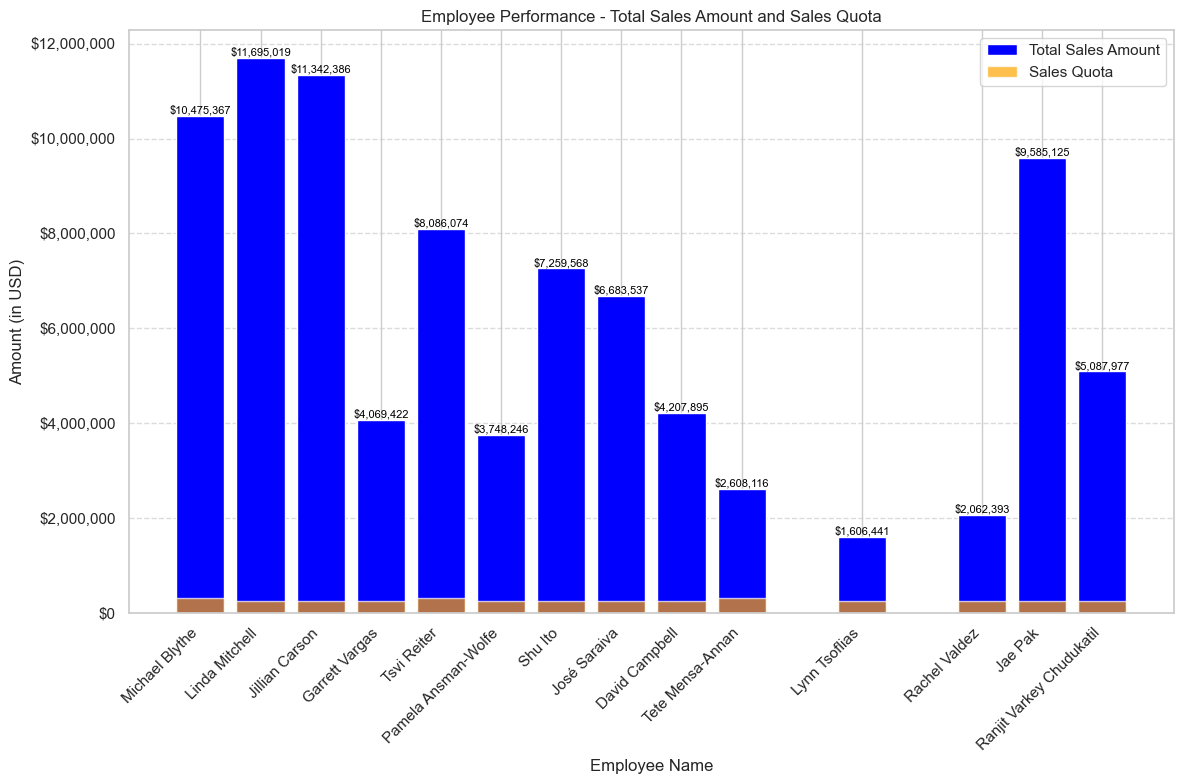

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Total Sales Amount bars in blue with labels
total_sales_bars = ax.bar(Employee_Performance_df['EmployeeID'], Employee_Performance_df['TotalSalesAmount'], color='blue', label='Total Sales Amount')

# Set y-axis ticks with specific values for better readability
y_ticks = ax.get_yticks()
ax.set_yticks(y_ticks)
ax.set_yticklabels(['${:,.0f}'.format(y) for y in y_ticks])

# Add sales amount values at the top of each Total Sales Amount bar
for bar, total_sales_amount in zip(total_sales_bars, Employee_Performance_df['TotalSalesAmount']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10000, '${:,.0f}'.format(total_sales_amount),
            ha='center', va='bottom', color='black', fontsize=8)

# Plot Sales Quota bars 
quota_bars = ax.bar(Employee_Performance_df['EmployeeID'], Employee_Performance_df['SalesQuota'], color='orange', alpha=0.7, label='Sales Quota')

# Set x-axis ticks and labels to display names of sales personnel
ax.set_xticks(Employee_Performance_df['EmployeeID'])
ax.set_xticklabels(Employee_Performance_df['FirstName'] + ' ' + Employee_Performance_df['LastName'], rotation=45, ha='right')

ax.set_xlabel('Employee Name')
ax.set_ylabel('Amount (in USD)')
ax.set_title('Employee Performance - Total Sales Amount and Sales Quota')
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 5. Inventory Value

In [18]:
Inventory_Value_Category = """
SELECT
    pc.ProductCategoryID AS CategoryID,
    pc.Name AS CategoryName,
    SUM(pi.Quantity) AS TotalCategoryInventory,
    SUM(pi.Quantity * p.StandardCost) AS TotalCategoryInventoryValue
FROM
    Production.Product AS p
INNER JOIN
    Production.ProductInventory AS pi ON p.ProductID = pi.ProductID
INNER JOIN
    Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN
    Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY
    pc.ProductCategoryID, pc.Name
ORDER BY
    pc.ProductCategoryID;
"""

Inventory_Value_Category_df = pd.read_sql_query(Inventory_Value_Category, con = engine)

In [19]:
Inventory_Value_Category_df

,CategoryID,CategoryName,TotalCategoryInventory,TotalCategoryInventoryValue
0,1,Bikes,15536,1.462365e+07
1,2,Components,47214,4.375837e+06
2,3,Clothing,5940,1.381329e+05
3,4,Accessories,9128,8.821176e+04


## 6. Inventory Value Over Time

In [20]:
Inventory_Value_OT = """
--(CTE) to calculate TotalCategoryInventory and TotalCategoryInventoryValue
WITH CategoryInventoryCTE AS (
    SELECT
        pc.ProductCategoryID AS CategoryID,
        pc.Name AS CategoryName,
        pi.Quantity AS TotalCategoryInventory,
        pi.Quantity * p.StandardCost AS TotalCategoryInventoryValue,
        YEAR(soh.OrderDate) AS OrderYear,
        MONTH(soh.OrderDate) AS OrderMonth
    FROM
        Production.Product AS p
    INNER JOIN
        Production.ProductInventory AS pi ON p.ProductID = pi.ProductID
    INNER JOIN
        Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
    INNER JOIN
        Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
    INNER JOIN
        Sales.SalesOrderDetail AS sod ON p.ProductID = sod.ProductID
    INNER JOIN
        Sales.SalesOrderHeader AS soh ON sod.SalesOrderID = soh.SalesOrderID
)
-- Main query using the CTE
SELECT
    CategoryID,
    CategoryName,
    SUM(TotalCategoryInventory) AS TotalCategoryInventory,
    SUM(TotalCategoryInventoryValue) AS TotalCategoryInventoryValue,
    OrderYear,
    OrderMonth
FROM
    CategoryInventoryCTE
GROUP BY
    CategoryID, CategoryName, OrderYear, OrderMonth
ORDER BY
    CategoryID, OrderYear, OrderMonth;

"""

Inventory_Value_OT_df = pd.read_sql_query(Inventory_Value_OT, con = engine)

In [21]:
Inventory_Value_OT_df

,CategoryID,CategoryName,TotalCategoryInventory,TotalCategoryInventoryValue,OrderYear,OrderMonth
0,1,Bikes,33066,3.513075e+07,2011,5
1,1,Bikes,22442,4.375601e+07,2011,6
2,1,Bikes,96164,1.305190e+08,2011,7
3,1,Bikes,122172,1.536114e+08,2011,8
4,1,Bikes,24749,4.743822e+07,2011,9
...,...,...,...,...,...,...
135,4,Accessories,958376,6.495986e+06,2014,2
136,4,Accessories,1259886,8.710702e+06,2014,3
137,4,Accessories,1141951,7.864984e+06,2014,4
138,4,Accessories,1223839,8.282022e+06,2014,5


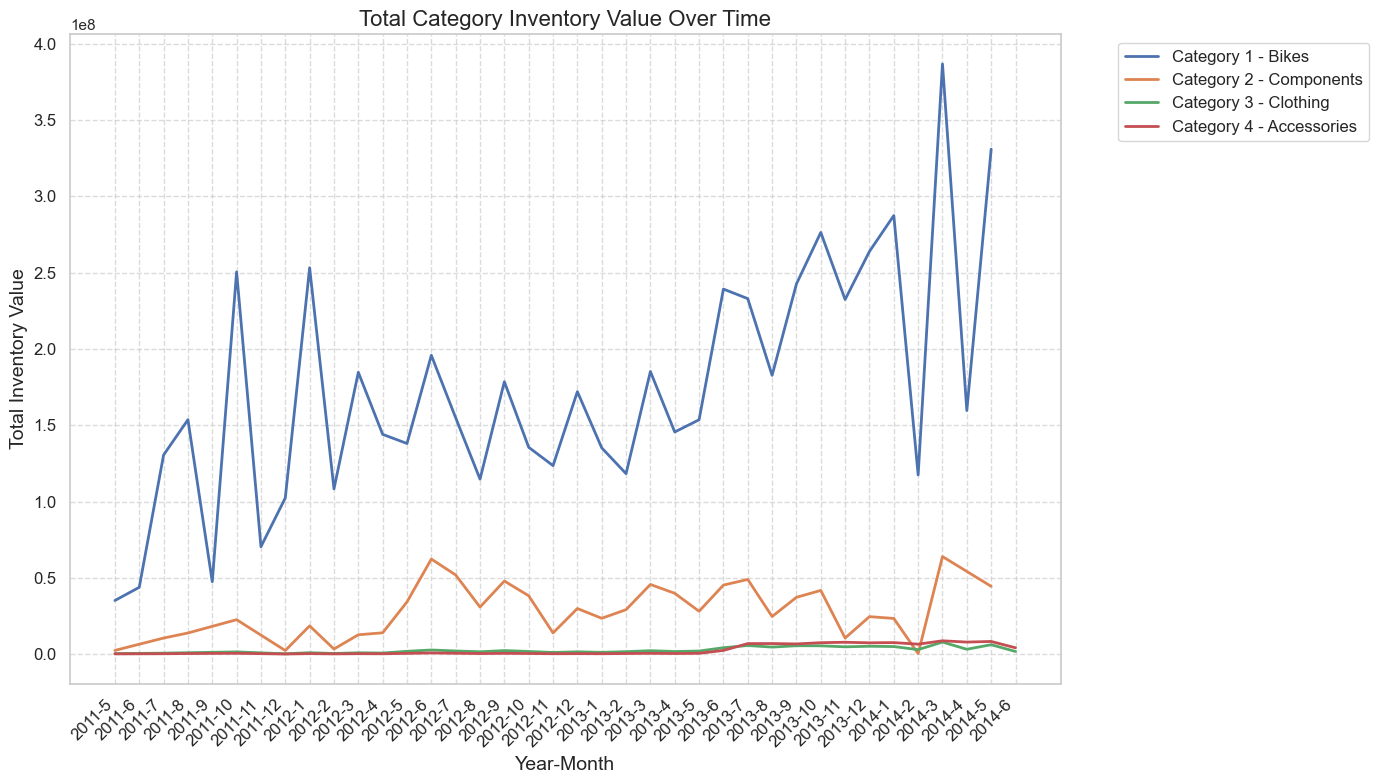

In [22]:

plt.figure(figsize=(14, 8))
for category_id, group in Inventory_Value_OT_df.groupby('CategoryID'):
    plt.plot(
        group['OrderYear'].astype(str) + '-' + group['OrderMonth'].astype(str),
        group['TotalCategoryInventoryValue'],
        label=f'Category {category_id} - {group["CategoryName"].iloc[0]}',
        linestyle='-',
        linewidth=2,
        markersize=8
    )

plt.title('Total Category Inventory Value Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Inventory Value', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Place legend outside the plot
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


## 7. Statistical Analysis

### Some descriptive statistics

In [23]:
#Inventory_Value_OT_df isthe DataFrame
statistics_total_inventory_value = Inventory_Value_OT_df['TotalCategoryInventoryValue'].describe()

# Display the statistics
statistics_total_inventory_value


count    1.400000e+02
mean     5.396415e+07
std      8.356109e+07
min      5.135064e+04
25%      1.503108e+06
50%      7.808060e+06
75%      6.269743e+07
max      3.868310e+08
Name: TotalCategoryInventoryValue, dtype: float64

### Confidence Interval (at 95.0% confidence):

In [27]:
import numpy as np
from scipy.stats import t 

# Confidence interval calculation
confidence_level = 0.95  
degrees_freedom = len(Inventory_Value_OT_df) - 1
mean_inventory = np.mean(Inventory_Value_OT_df['TotalCategoryInventoryValue'])  
standard_error = np.std(Inventory_Value_OT_df['TotalCategoryInventoryValue'], ddof=1) / np.sqrt(len(Inventory_Value_OT_df))
margin_of_error = t.ppf((1 + confidence_level) / 2, degrees_freedom) * standard_error
confidence_interval = (
    round(mean_inventory - margin_of_error, 2),
    round(mean_inventory + margin_of_error, 2)
)

In [28]:
# Display CI
lower_bound = round(confidence_interval[0], 2)
upper_bound = round(confidence_interval[1], 2)
print(f'Confidence Interval for Inventory (at {confidence_level * 100}% confidence): [{lower_bound}, {upper_bound}]')

# Calculate and display median 
median_inventory = round(Inventory_Value_OT_df['TotalCategoryInventoryValue'].median(), 2)
print(f'Inventory Median Value: {median_inventory}')


Confidence Interval for Inventory (at 95.0% confidence): [40000919.84, 67927372.62]
Inventory Median Value: 7808060.26


## 7.1. Statistical Analysis interpretation

## 7.2. Mean Vs Median

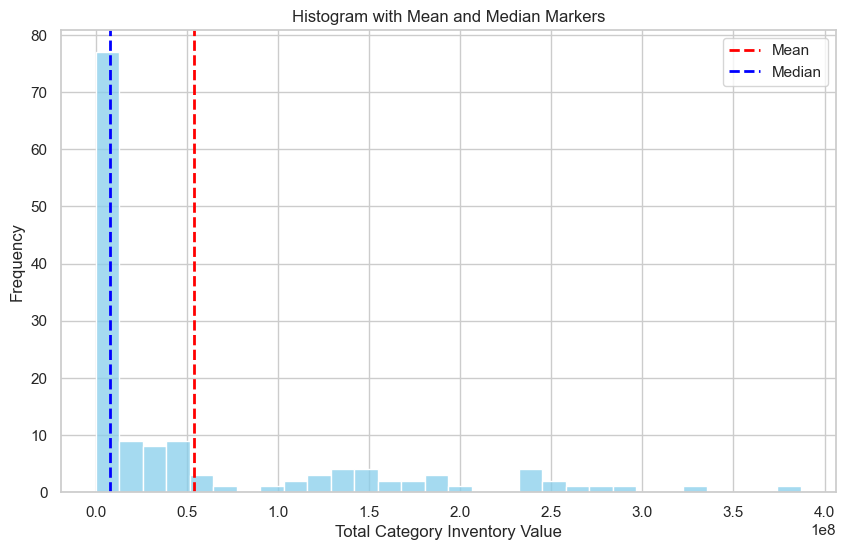

In [29]:
mean_inventory = 53964146.23
median_inventory = 7808060.26

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Inventory_Value_OT_df, x='TotalCategoryInventoryValue', bins=30, color='skyblue')

# Add markers for mean and median
plt.axvline(mean_inventory, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_inventory, color='blue', linestyle='dashed', linewidth=2, label='Median')

# Set labels and title
plt.xlabel('Total Category Inventory Value')
plt.ylabel('Frequency')
plt.title('Histogram with Mean and Median Markers')

plt.legend()
plt.show()


## 8. Mean Of Inventory Over time

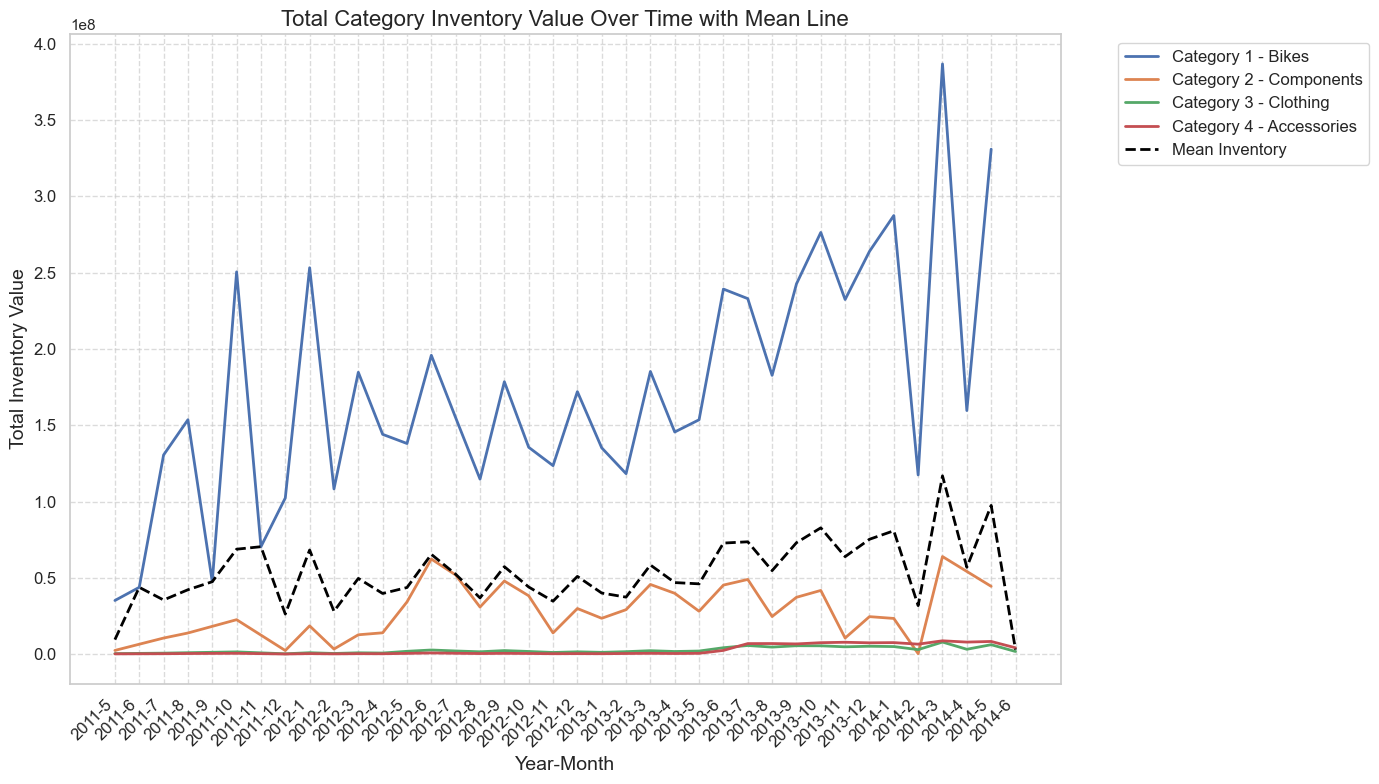

In [30]:
mean_inventory_over_time = Inventory_Value_OT_df.groupby(['OrderYear', 'OrderMonth'])['TotalCategoryInventoryValue'].mean().reset_index()

plt.figure(figsize=(14, 8))

# Plot individual category lines
for category_id, group in Inventory_Value_OT_df.groupby('CategoryID'):
    plt.plot(
        group['OrderYear'].astype(str) + '-' + group['OrderMonth'].astype(str),
        group['TotalCategoryInventoryValue'],
        label=f'Category {category_id} - {group["CategoryName"].iloc[0]}',
        linestyle='-',
        linewidth=2
    )

# Plot mean line
plt.plot(
    mean_inventory_over_time['OrderYear'].astype(str) + '-' + mean_inventory_over_time['OrderMonth'].astype(str),
    mean_inventory_over_time['TotalCategoryInventoryValue'],
    label='Mean Inventory',
    linestyle='--',  
    color='black',  
    linewidth=2
)

plt.title('Total Category Inventory Value Over Time with Mean Line', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Inventory Value', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


## 9. Mean Of Inventory Over time (Excluding Bikes)

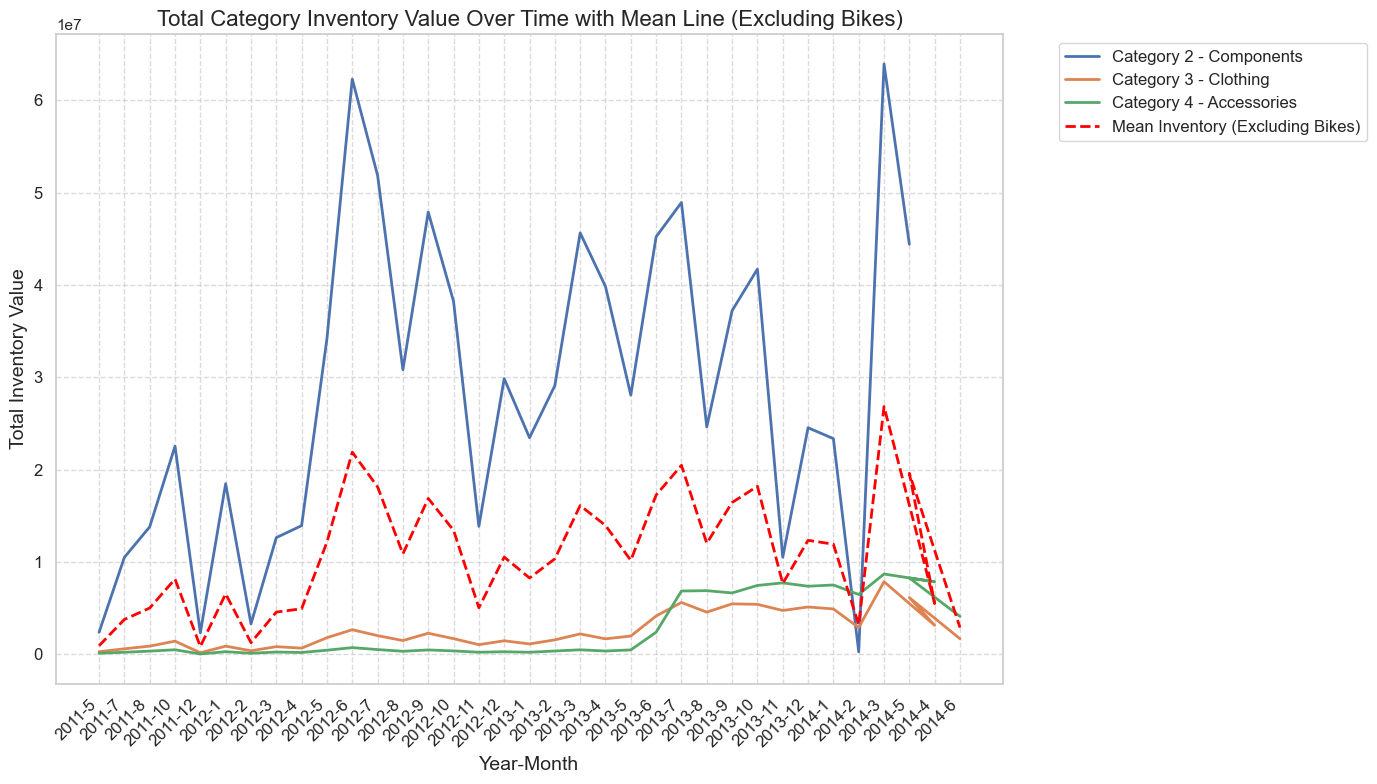

In [31]:
filtered_df = Inventory_Value_OT_df[Inventory_Value_OT_df['CategoryID'] != 1]
mean_inventory_over_time_excluding_bikes = filtered_df.groupby(['OrderYear', 'OrderMonth'])['TotalCategoryInventoryValue'].mean().reset_index()

plt.figure(figsize=(14, 8))

# Plot individual category lines excluding Category 1 (Bikes)
for category_id, group in filtered_df.groupby('CategoryID'):
    plt.plot(
        group['OrderYear'].astype(str) + '-' + group['OrderMonth'].astype(str),
        group['TotalCategoryInventoryValue'],
        label=f'Category {category_id} - {group["CategoryName"].iloc[0]}',
        linestyle='-',
        linewidth=2
    )

# Plot mean line excluding Category 1 (Bikes)
plt.plot(
    mean_inventory_over_time_excluding_bikes['OrderYear'].astype(str) + '-' + mean_inventory_over_time_excluding_bikes['OrderMonth'].astype(str),
    mean_inventory_over_time_excluding_bikes['TotalCategoryInventoryValue'],
    label='Mean Inventory (Excluding Bikes)',
    linestyle='--',
    color='red',
    linewidth=2
)

plt.title('Total Category Inventory Value Over Time with Mean Line (Excluding Bikes)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Inventory Value', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 10. Mean Lines For Inventory with/without Bikes

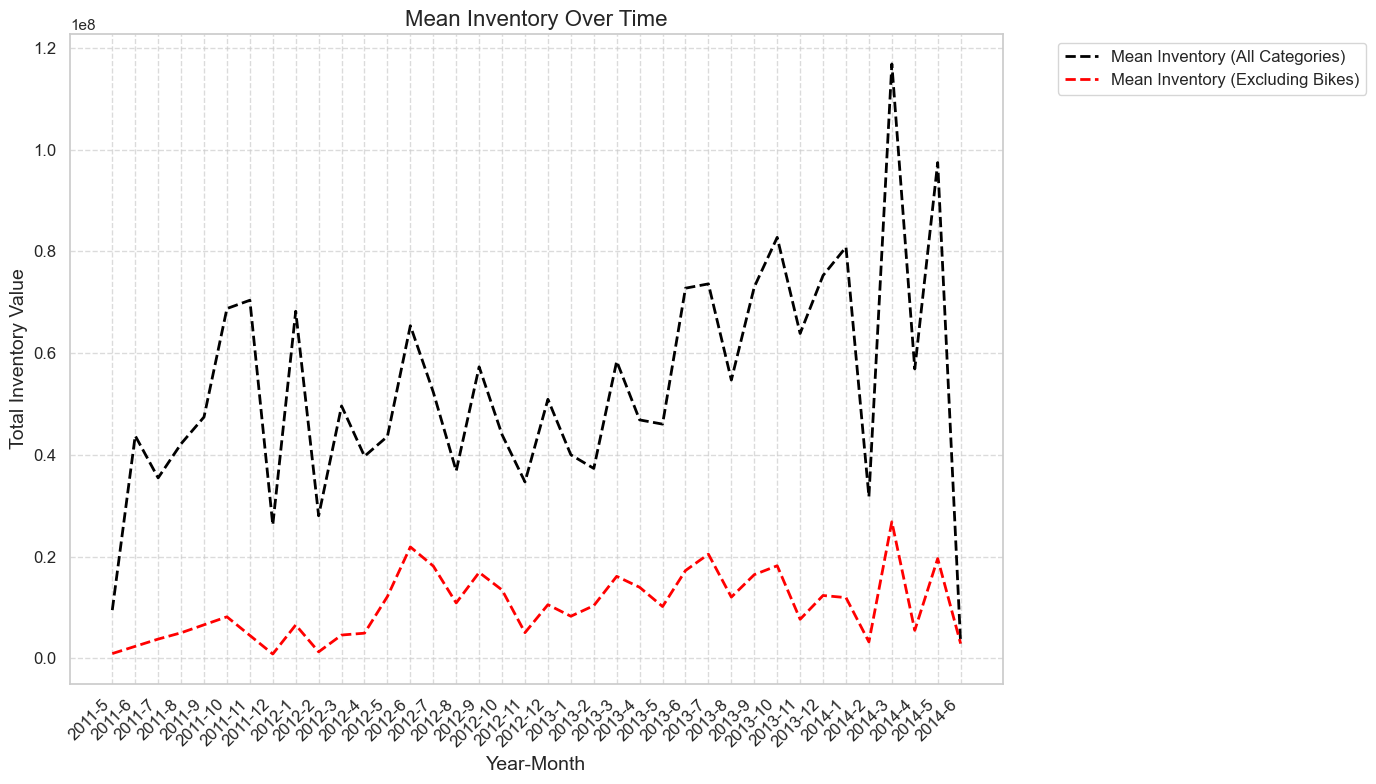

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean inventory over time including all categories
mean_inventory_over_time_all = Inventory_Value_OT_df.groupby(['OrderYear', 'OrderMonth'])['TotalCategoryInventoryValue'].mean().reset_index()

# DataFrame named filtered_df that excludes Category 1 (Bikes)
filtered_df = Inventory_Value_OT_df[Inventory_Value_OT_df['CategoryID'] != 1]
mean_inventory_over_time_excluding_bikes = filtered_df.groupby(['OrderYear', 'OrderMonth'])['TotalCategoryInventoryValue'].mean().reset_index()

plt.figure(figsize=(14, 8))

# Plot mean line including all categories
plt.plot(
    mean_inventory_over_time_all['OrderYear'].astype(str) + '-' + mean_inventory_over_time_all['OrderMonth'].astype(str),
    mean_inventory_over_time_all['TotalCategoryInventoryValue'],
    label='Mean Inventory (All Categories)',
    linestyle='--',  
    color='black',  
    linewidth=2
)

# Plot mean line excluding Category 1 (Bikes)
plt.plot(
    mean_inventory_over_time_excluding_bikes['OrderYear'].astype(str) + '-' + mean_inventory_over_time_excluding_bikes['OrderMonth'].astype(str),
    mean_inventory_over_time_excluding_bikes['TotalCategoryInventoryValue'],
    label='Mean Inventory (Excluding Bikes)',
    linestyle='--',  
    color='red',  
    linewidth=2
)

plt.title('Mean Inventory Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Inventory Value', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


### Recommendations:

In conclusion, leveraging insights from top-performing products, employee contributions, and market distribution, we propose strategic adjustments in pricing, supply chain practices, and data-driven decision-making.
